# Visualización de datos categóricos con seaborn

Los datos categóricos, como su palabra lo indica, son aquellos que se utilizan para clasificar justamente los datos en categorías. Por ejemplo, este dato corersponde a un tipo de especie animal, este otro representa el país de origen, etc. Por este motivo, se diferencian de los datos numéricos que solo expresan una cantidad numérica para representar algo.

![seaborn - datos categoricos](./seaborn3.png)

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
sns.set_theme(style="ticks", context="talk", palette="tab10")

consumos = sns.load_dataset("tips")
consumos.columns = ["total", "propina", "genero", "fumador", "dia", "tipo", "comensales"]

consumos.head()

,total,propina,genero,fumador,dia,tipo,comensales
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
consumos.shape

(244, 7)

In [47]:
consumos[consumos["fumador"] == "Yes"].shape

(93, 7)

In [48]:
consumos.value_counts(subset=["tipo", "dia"])

tipo    dia 
Dinner  Sat     87
        Sun     76
Lunch   Thur    61
Dinner  Fri     12
Lunch   Fri      7
Dinner  Thur     1
Name: count, dtype: int64

In [49]:
genero = {
    "Female": "Femenino",
    "Male": "Masculino"
}

fumador = {
    "Yes": "Si"
}

dia = {
    "Mon": "Lunes",
    "Tue": "Martes",
    "Wed": "Miercoles",
    "Thur": "Jueves",
    "Fri": "Viernes",
    "Sat": "Sabado",
    "Sun": "Domingo"
}

tipo = {
    "Dinner": "Cena",
    "Lunch": "Almuerzo"
}

consumos["genero"] = consumos["genero"].replace(genero, regex=True)
consumos["fumador"] = consumos["fumador"].replace(fumador, regex=True)
consumos["dia"] = consumos["dia"].replace(dia, regex=True)
consumos["tipo"] = consumos["tipo"].replace(tipo, regex=True)

<ipython-input-49-e9dd653f4c0a>:25: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  consumos["genero"] = consumos["genero"].replace(genero, regex=True)
<ipython-input-49-e9dd653f4c0a>:26: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  consumos["fumador"] = consumos["fumador"].replace(fumador, regex=True)
<ipython-input-49-e9dd653f4c0a>:27: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat

In [50]:
consumos

,total,propina,genero,fumador,dia,tipo,comensales
0,16.99,1.01,Femenino,No,Domingo,Cena,2
1,10.34,1.66,Masculino,No,Domingo,Cena,3
2,21.01,3.50,Masculino,No,Domingo,Cena,3
3,23.68,3.31,Masculino,No,Domingo,Cena,2
4,24.59,3.61,Femenino,No,Domingo,Cena,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Masculino,No,Sabado,Cena,3
240,27.18,2.00,Femenino,Si,Sabado,Cena,2
241,22.67,2.00,Masculino,Si,Sabado,Cena,2
242,17.82,1.75,Masculino,No,Sabado,Cena,2


## Gráficas categóricas de dispersión

### Gráfica stripplot

Para empezar, utilizamos en el eje x un dato de tipo categórico, de clasificación y discreto. En este caso, se optó por los días de la semana:

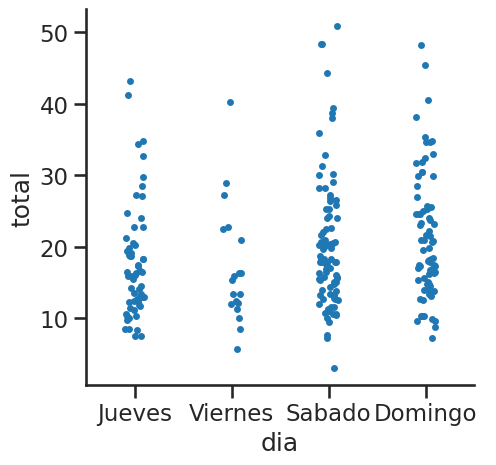

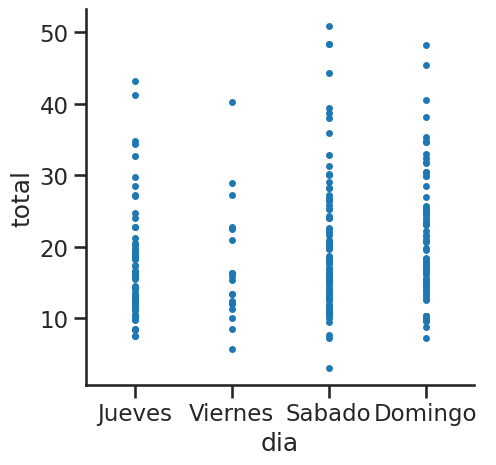

In [51]:
sns.catplot(x="dia", y="total", data=consumos) # la grafica categorica por defecto es stripplot o de bandas

sns.catplot(x="dia", y="total", data=consumos, jitter=False)

plt.show()

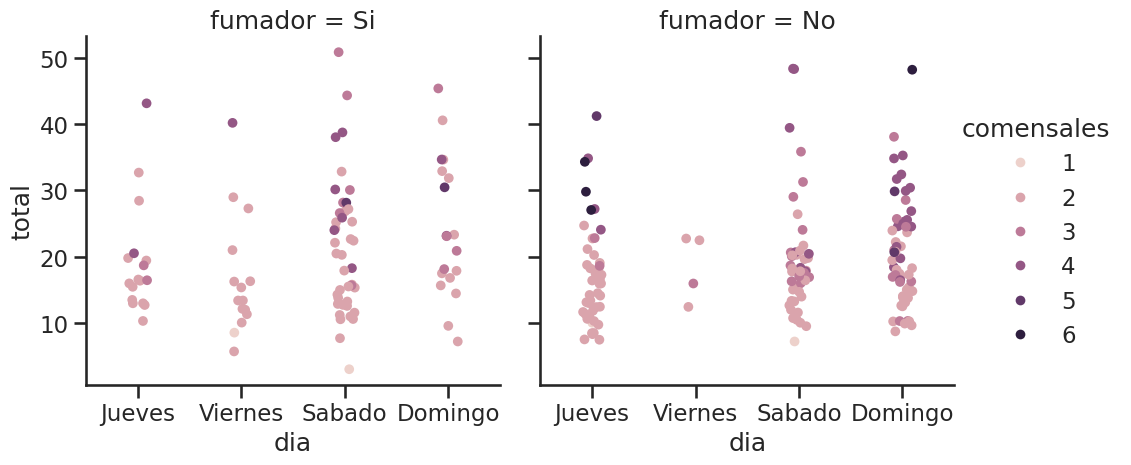

In [52]:
sns.catplot(
    x="dia",
    y="total",
    data=consumos,
    hue="comensales",
    col="fumador",
    size=7)

plt.show()

### Gráfica swarmplot

Las gráficas de dispersión de tipo swarmplot con muy similares a las de stripplot, con la diferencia que en el caso de swarmplot aquellos datos que se encuentre aparejados en cuanto a valor, además los colocará horizontalmente, uno junto al otro. Observar, por ejemplo, en el gráfico de abajo el caso del día sábado, el valor de total 20.

Es por este motivo que este tipo de gráfico se suele utilizar cuando existe una poca cantidad de datos ya que la visualización y representación no sería la adecuada para el caso de una gran cantidad de datos.

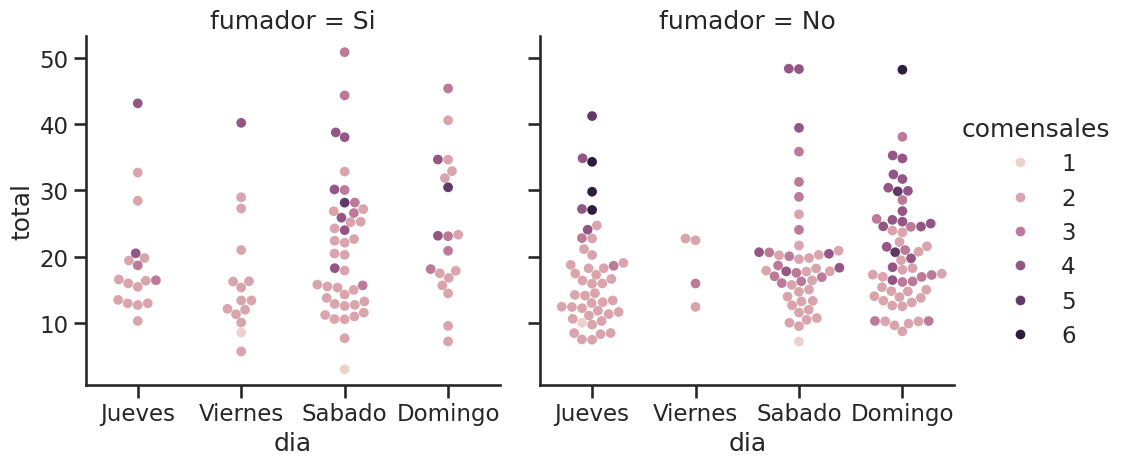

In [53]:
# swarmplot o colmena de abeja

sns.catplot(
    kind="swarm",
    x="dia",
    y="total",
    data=consumos,
    hue="comensales",
    col="fumador",
    size=7)

plt.show()

## Gráficas categóricas de Distribución

### Gráfica Boxplot

Este tipo de gráfica es muy similar a boxplot de matplotlib

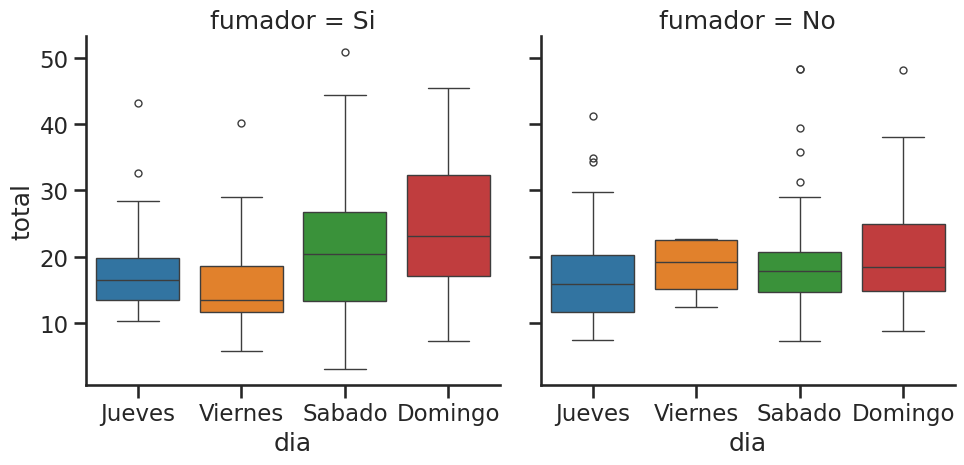

In [54]:
sns.catplot(
    kind="box",
    x="dia",
    y="total",
    data=consumos,
    col="fumador",
    hue="dia"
)

plt.show()

### Gráfica Boxenplot

Tipo de gráfica más compleja de interpretar que boxplot.

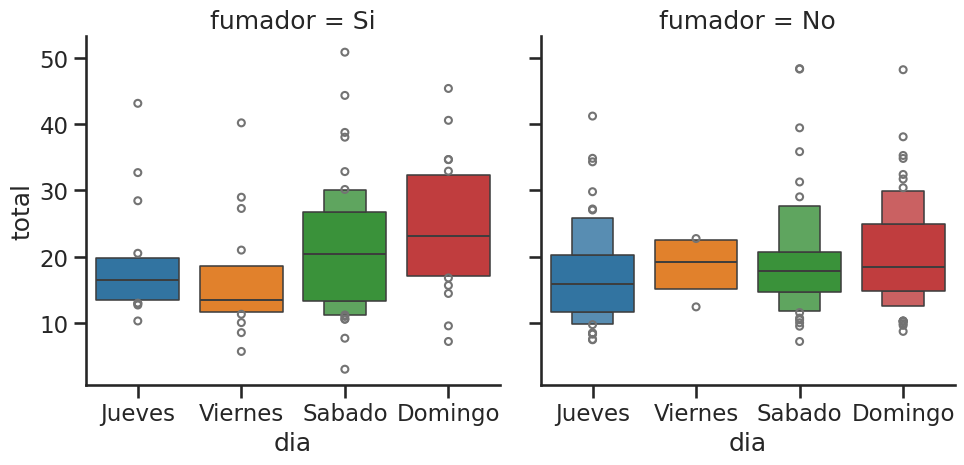

In [55]:
sns.catplot(
    kind="boxen",
    x="dia",
    y="total",
    data=consumos,
    col="fumador",
    hue="dia"
)

plt.show()

### Gráfica Violinplot

Visualmente, la parte más "ancha" del violín hace referencia a la media de los datos.

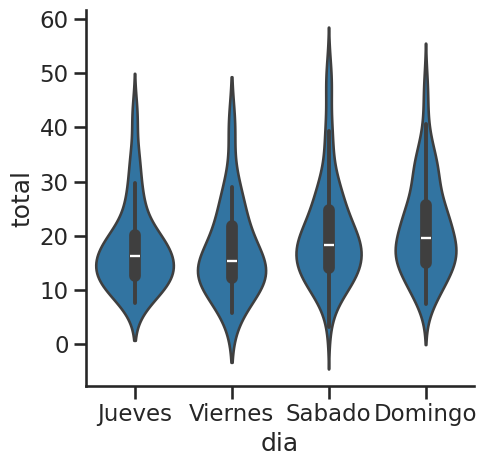

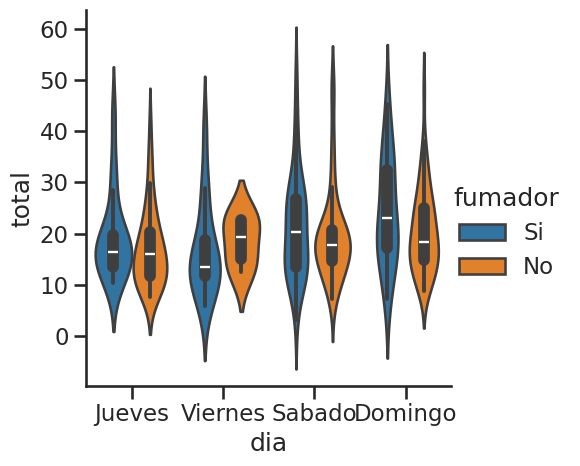

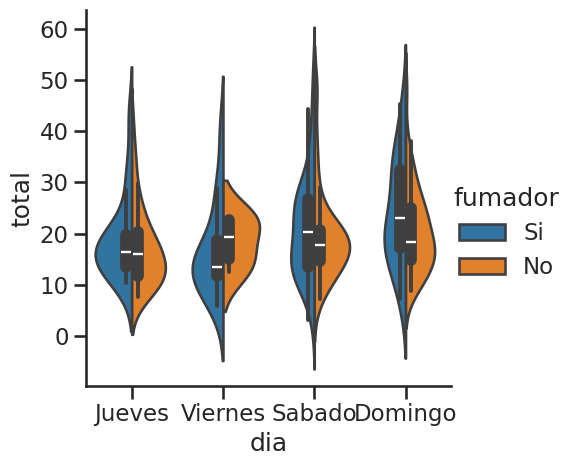

In [56]:
sns.catplot(
    kind="violin",
    x="dia",
    y="total",
    data=consumos
)

sns.catplot(
    kind="violin",
    x="dia",
    y="total",
    data=consumos,
    hue="fumador"
)

sns.catplot(
    kind="violin",
    x="dia",
    y="total",
    data=consumos,
    hue="fumador",
    split=True
)

plt.show()

## Gráficas categóricas de Estimación

Representan el intervalo de confianza del promedio, o también del desvío.

### Gráfica Pointplot

Este tipo de gráfico, en este ejemplo, muestra, para cada día, con un punto, cuál es el promedio estimado de total de los consumos de ese día. La barra vertical o línea que atraviesa cada punto, por otro lado, representa el intervalo de confianza, por defecto en un 95% de que ese promedio estimado se va a encontrar entre esos valores.

Por ejemplo, tomemos el caso del total para fumadores de los viernes. El promedio estimado sería 16, y existe una confianza del 95% de que el promedio real se encuentre entre 12 y 22.

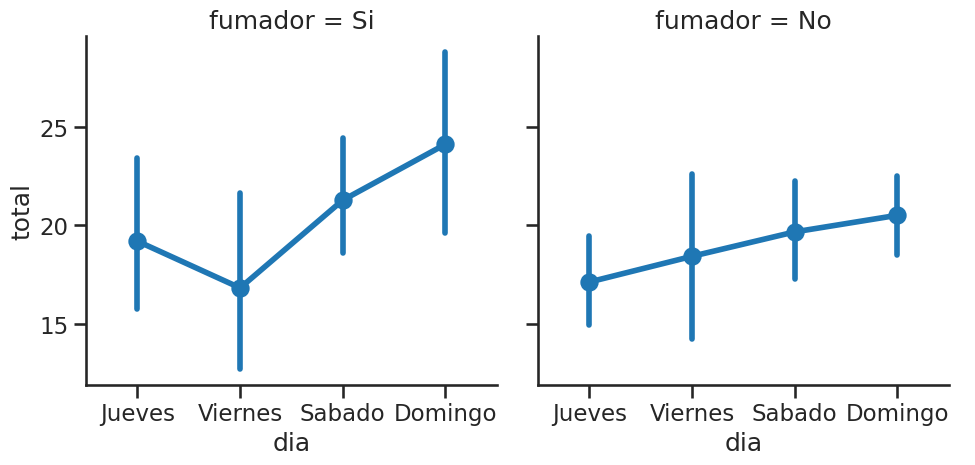

In [59]:
sns.catplot(
    x="dia",
    y="total",
    data=consumos,
    kind="point",
    col="fumador"
)

plt.show()

### Gráfica barplot

Similar al caso anterior, solo que en este caso el promedio estimado se encontraría en el límite superior de la barra, y las líneas negras representan los intervalos de confianza.

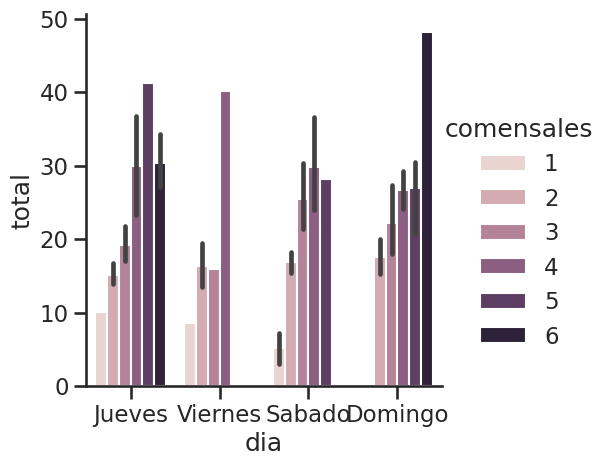

In [61]:
sns.catplot(
    x="dia",
    y="total",
    data=consumos,
    kind="bar",
    hue="comensales"
)

plt.show()

### Gráfica countplot

Es similar a un histograma, pero con categorías.

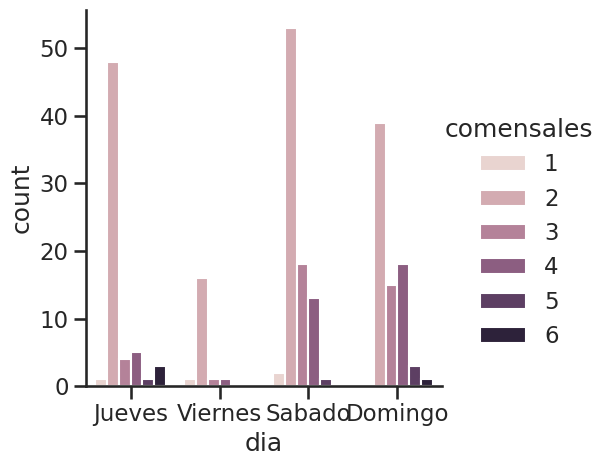

In [63]:
sns.catplot(
    x="dia",
    data=consumos,
    kind="count",
    hue="comensales"
)

plt.show()